In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm 
import seaborn as sns

In [16]:
# Read the CSV file
online_retail = pd.read_csv('Online Retail.csv', encoding_errors='ignore')

# Convert the date column to datetime format
online_retail['InvoiceDate'] = pd.to_datetime(online_retail['InvoiceDate'])

# Add the day of the week in the format 'ddd' (e.g., 'Mon', 'Tue', etc.)
online_retail['Day of the Week'] = online_retail['InvoiceDate'].dt.day_name()

#Separted Date and Time
online_retail['InvoiceTime'] = online_retail['InvoiceDate'].dt.time
online_retail['InvoiceDate'] = online_retail['InvoiceDate'].dt.date

# Add Cancel column to identify is invoice has been cancelled
online_retail['Cancelled'] = online_retail['InvoiceNo'][0] == 'C'
online_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day of the Week,InvoiceTime,Cancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,Wednesday,08:26:00,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,Wednesday,08:26:00,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,Wednesday,08:26:00,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,Wednesday,08:26:00,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,Wednesday,08:26:00,False
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France,Friday,12:50:00,False
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,Friday,12:50:00,False
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,Friday,12:50:00,False
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,Friday,12:50:00,False


In [17]:
#
online_retail['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [18]:
online_retail.dropna(subset=['Country'], inplace=True)
online_retail['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [19]:
#dropping 'Unspecified', 'European Community'
online_retail = online_retail[~online_retail['Country'].isin(('Unspecified', 'European Community'))]
online_retail['Country'].unique()
online_retail


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day of the Week,InvoiceTime,Cancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,Wednesday,08:26:00,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,Wednesday,08:26:00,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,Wednesday,08:26:00,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,Wednesday,08:26:00,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,Wednesday,08:26:00,False
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France,Friday,12:50:00,False
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,Friday,12:50:00,False
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,Friday,12:50:00,False
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,Friday,12:50:00,False


In [20]:
#Drop description and stockcode
online_retail.drop('Description', axis='columns', inplace=True)
#online_retail.add('StockCode', axis='columns', inplace=True)
online_retail


C:\Users\Prisc\AppData\Local\Temp\ipykernel_12240\126934565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_retail.drop('Description', axis='columns', inplace=True)


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day of the Week,InvoiceTime,Cancelled
0,536365,85123A,6,2010-12-01,2.55,17850.0,United Kingdom,Wednesday,08:26:00,False
1,536365,71053,6,2010-12-01,3.39,17850.0,United Kingdom,Wednesday,08:26:00,False
2,536365,84406B,8,2010-12-01,2.75,17850.0,United Kingdom,Wednesday,08:26:00,False
3,536365,84029G,6,2010-12-01,3.39,17850.0,United Kingdom,Wednesday,08:26:00,False
4,536365,84029E,6,2010-12-01,3.39,17850.0,United Kingdom,Wednesday,08:26:00,False
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,12,2011-12-09,0.85,12680.0,France,Friday,12:50:00,False
541905,581587,22899,6,2011-12-09,2.10,12680.0,France,Friday,12:50:00,False
541906,581587,23254,4,2011-12-09,4.15,12680.0,France,Friday,12:50:00,False
541907,581587,23255,4,2011-12-09,4.15,12680.0,France,Friday,12:50:00,False


In [21]:
online_retail['Total'] = online_retail['UnitPrice'] * online_retail['Quantity']
#total = online_retail.groupby('InvoiceNo')['Total'].sum().reset_index()
online_retail
#pd.merge(total, online_retail.drop(['Quantity', 'UnitPrice'], axis='columns').drop_duplicates(), on='InvoiceNo', how='inner')

C:\Users\Prisc\AppData\Local\Temp\ipykernel_12240\284993697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_retail['Total'] = online_retail['UnitPrice'] * online_retail['Quantity']


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day of the Week,InvoiceTime,Cancelled,Total
0,536365,85123A,6,2010-12-01,2.55,17850.0,United Kingdom,Wednesday,08:26:00,False,15.30
1,536365,71053,6,2010-12-01,3.39,17850.0,United Kingdom,Wednesday,08:26:00,False,20.34
2,536365,84406B,8,2010-12-01,2.75,17850.0,United Kingdom,Wednesday,08:26:00,False,22.00
3,536365,84029G,6,2010-12-01,3.39,17850.0,United Kingdom,Wednesday,08:26:00,False,20.34
4,536365,84029E,6,2010-12-01,3.39,17850.0,United Kingdom,Wednesday,08:26:00,False,20.34
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,12,2011-12-09,0.85,12680.0,France,Friday,12:50:00,False,10.20
541905,581587,22899,6,2011-12-09,2.10,12680.0,France,Friday,12:50:00,False,12.60
541906,581587,23254,4,2011-12-09,4.15,12680.0,France,Friday,12:50:00,False,16.60
541907,581587,23255,4,2011-12-09,4.15,12680.0,France,Friday,12:50:00,False,16.60


In [35]:
#group
group_customers = online_retail.groupby(['InvoiceNo', 'CustomerID', 'InvoiceDate', 'InvoiceTime', 'Country', 'Day of the Week','Cancelled'], group_keys=True)[['Country','Total', 'Quantity']].sum(lambda x: x)
group_customers

,,,,,,,Total,Quantity
InvoiceNo,CustomerID,InvoiceDate,InvoiceTime,Country,Day of the Week,Cancelled,,
536365,17850.0,2010-12-01,08:26:00,United Kingdom,Wednesday,False,139.12,40
536366,17850.0,2010-12-01,08:28:00,United Kingdom,Wednesday,False,22.20,12
536367,13047.0,2010-12-01,08:34:00,United Kingdom,Wednesday,False,278.73,83
536368,13047.0,2010-12-01,08:34:00,United Kingdom,Wednesday,False,70.05,15
536369,13047.0,2010-12-01,08:35:00,United Kingdom,Wednesday,False,17.85,3
...,...,...,...,...,...,...,...,...
C581484,16446.0,2011-12-09,09:27:00,United Kingdom,Friday,False,-168469.60,-80995
C581490,14397.0,2011-12-09,09:57:00,United Kingdom,Friday,False,-32.53,-23
C581499,15498.0,2011-12-09,10:28:00,United Kingdom,Friday,False,-224.69,-1


In [38]:
group_customers.groupby('Country')['Total'].describe()

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Australia,69.0,1986.627101,4982.065565,-425.00,81.6000,358.250,608.7600,22775.93
Austria,19.0,534.437895,415.145027,-24.20,204.4200,484.860,725.0100,1542.08
Bahrain,2.0,274.200000,261.912352,89.00,181.6000,274.200,366.8000,459.40
Belgium,119.0,343.789580,308.091419,-48.85,144.5800,300.760,478.5200,1491.59
Brazil,1.0,1143.600000,NaN,1143.60,1143.6000,1143.600,1143.6000,1143.60
Canada,6.0,611.063333,495.163105,51.56,238.9650,542.590,1016.3300,1217.64
Channel Islands,33.0,608.675455,614.548939,-293.00,74.9000,363.530,1103.1500,2060.03
Cyprus,20.0,647.314500,815.383914,-320.69,120.0375,390.790,981.1225,2876.85
Czech Republic,5.0,141.544000,266.992031,-57.51,-57.5100,-4.000,277.4800,549.26


<Axes: xlabel='Total', ylabel='Country'>

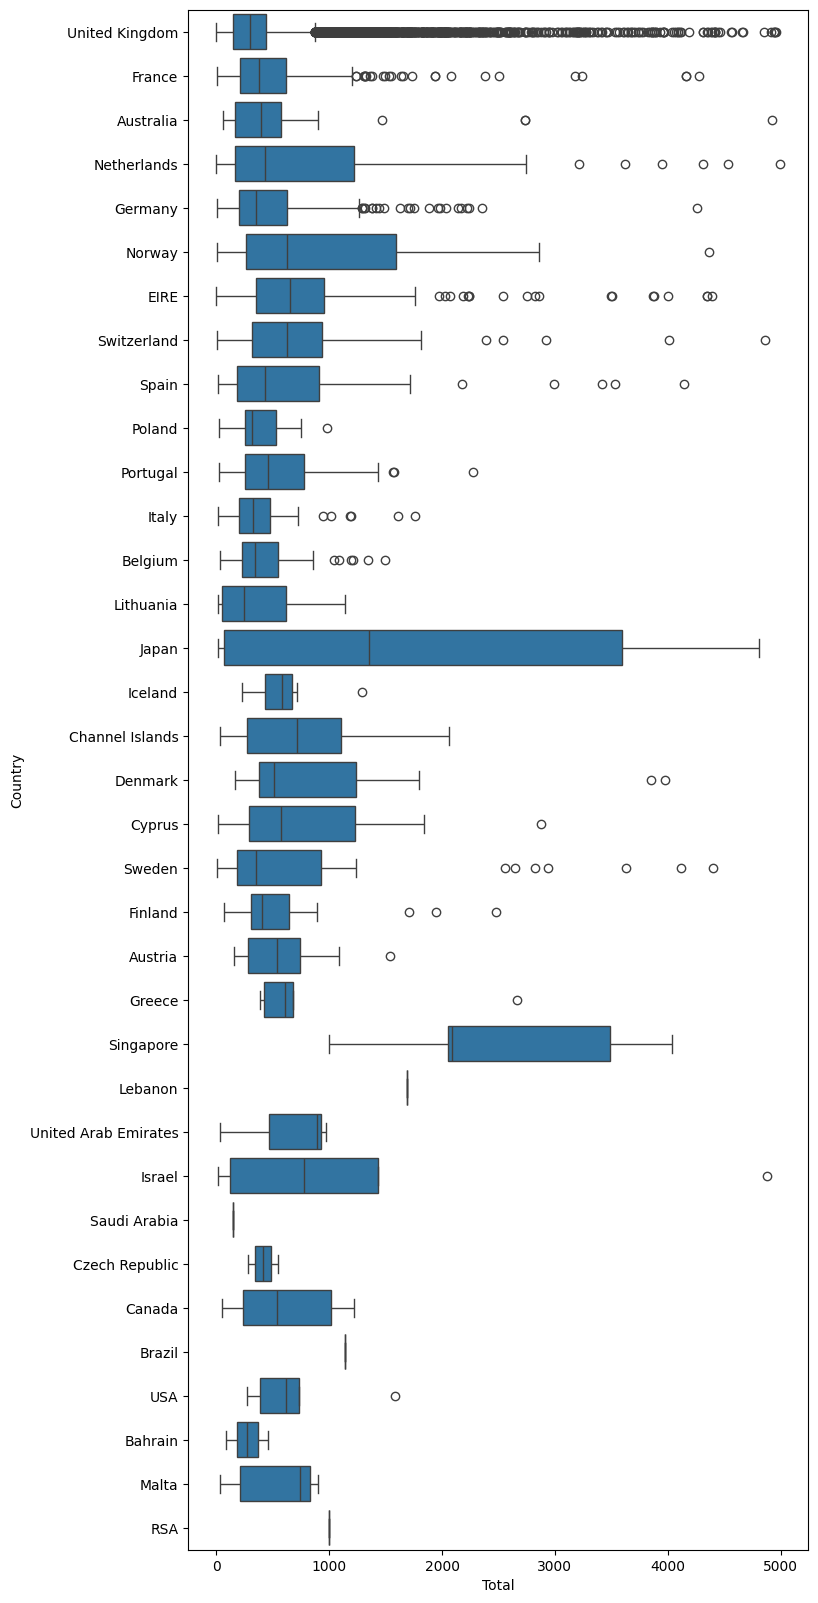

In [55]:
df = group_customers
filtered_df = df[(df['Total'] <= 5000) & (df['Total'] >= -000)]
plt.figure(figsize=(8, 20))
sns.boxplot(x = 'Total', y = 'Country', data = filtered_df, orient = 'h')